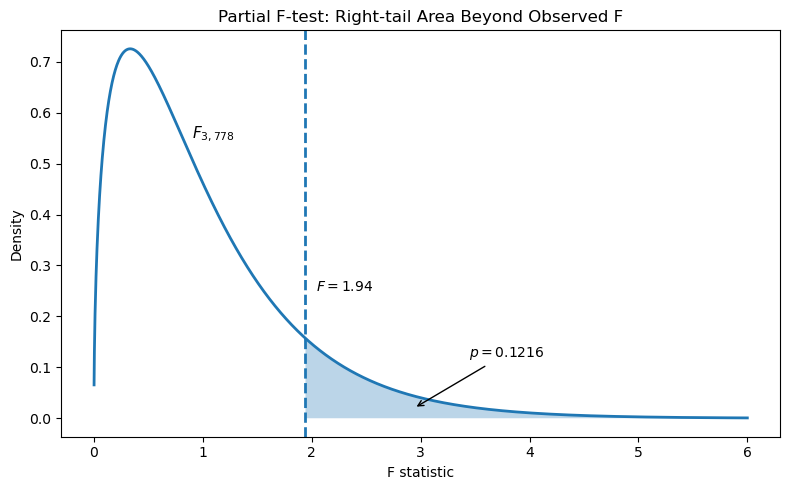

Approximate right-tail p-value: 0.121648


In [28]:
# Generate an F-distribution plot with a marked F statistic and shaded p-value tail.

import numpy as np
import matplotlib.pyplot as plt
import mpmath as mp

# Degrees of freedom and observed F from the notes
df1 = 3    # numerator df
df2 = 778  # denominator df
F_obs = 1.94

# F-distribution PDF defined via Beta function
def f_pdf(x, d1, d2):
    if x <= 0:
        return 0.0
    a = d1 / 2.0
    b = d2 / 2.0
    c = (d1 / d2) ** a / mp.beta(a, b)
    return float(c * x ** (a - 1) * (1 + (d1 / d2) * x) ** (-(a + b)))

# Grid for the PDF
x = np.linspace(0.001, 6, 2000)
y = np.array([f_pdf(val, df1, df2) for val in x])

# Right-tail p-value via numeric integration
p_tail = mp.quad(lambda t: f_pdf(t, df1, df2), [F_obs, mp.inf])

# Plot
plt.figure(figsize=(8, 5))
plt.plot(x, y, linewidth=2, label=f"F PDF (df1={df1}, df2={df2})")

# Shade the right tail
x_shade = x[x >= F_obs]
y_shade = y[x >= F_obs]
if len(x_shade) > 1:
    plt.fill_between(x_shade, y_shade, alpha=0.3, label="Right-tail p-value")

# Mark observed F
plt.axvline(F_obs, linestyle="--", linewidth=2, label=f"Observed F = {F_obs}")
plt.text(F_obs + 0.1, 0.25, r'$F = 1.94$', fontsize=10, fontweight='bold')

# Annotations
plt.text(0.9, 0.55, r'$F_{3,778}$', fontsize=11, fontweight='bold')

# Annotate p-value with arrow
plt.annotate(r'$p = 0.1216$', 
            xy=(F_obs + 1, 0.02), 
            xytext=(F_obs + 1.5, 0.12), 
            arrowprops=dict(arrowstyle='->'),
            fontsize=10)

plt.xlabel("F statistic")
plt.ylabel("Density")
plt.title("Partial F-test: Right-tail Area Beyond Observed F")
plt.tight_layout()

# plt.savefig(out_path, dpi=200)
plt.show()

print(f"Approximate right-tail p-value: {float(p_tail):.6f}")
